In [1]:
# import Numpy and Pandas
import numpy as np
import pandas as pd

# for reading and displaying images, import imread and matplotlib
import matplotlib.pyplot as plt

# for creating validation set, import train_test_split; understand how the function works
from sklearn.model_selection import train_test_split

# for evaluating the model, import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# Import necessary PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Import dataset from pytorch vision - Fashion MNIST
import torchvision
import torchvision.transforms as transforms


In [2]:
# load dataset and use dataloader to send the data in batches.
# Convert data to tensor and normalise it.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle-boot')

In [3]:
print("Length of training set : ",len(trainset))
image,label=trainset[0]
print("Image Size : ",image.size())

Length of training set :  60000
Image Size :  torch.Size([1, 28, 28])


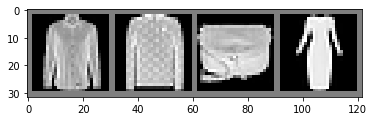

Shirt Pullover   Bag Dress


In [4]:
# Visualise some random images from the datset. Check the shape of tensors to get a better understanding of the dataset.
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
# Define the network architecture(model) using a class.
# Use conv2d layers, activation function after each such layer, use Batchnorm and Maxpooling. Play with these parameters,
# layers and things like kernel size, stride etc and see how it affects your results.
# Finally use a linear layer in the end
# Define the forward pass
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 4)
        self.fc2 = nn.Linear(4,30* 84)
        self.fc3 = nn.Linear(30*84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [6]:
# Define the network architecture(model) using a class.
# Use conv2d layers, activation function after each such layer, use Batchnorm and Maxpooling. Play with these parameters,
# layers and things like kernel size, stride etc and see how it affects your results.
# Finally use a linear layer in the end
# Define the forward pass
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Below cells are training the model(takes so much time) and are saved in the respective path..Better not to run..Directly move to the testing part.

In [31]:
#************************************ SECOND MODEL *************************************************
#******************************SGD as OPTIMIZER && CROSS ENTROPY as LOSS Func********************************
# Define training the model
net = Net1()
# defining the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# For each epoch and in each batch:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # clear the gradients
        optimizer.zero_grad()

        # compute the model output
        outputs = net(inputs)
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        CELloss = criterion(outputs, labels)
        # propagate loss backwards
        CELloss.backward()
        # update model weights
        optimizer.step()
        # print statistics
        running_loss += CELloss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] CELloss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] CELloss: 1.047
[1,  4000] CELloss: 0.584
[1,  6000] CELloss: 0.514
[1,  8000] CELloss: 0.462
[1, 10000] CELloss: 0.426
[1, 12000] CELloss: 0.393
[1, 14000] CELloss: 0.383
[2,  2000] CELloss: 0.342
[2,  4000] CELloss: 0.328
[2,  6000] CELloss: 0.337
[2,  8000] CELloss: 0.316
[2, 10000] CELloss: 0.314
[2, 12000] CELloss: 0.311
[2, 14000] CELloss: 0.305
Finished Training


In [32]:
#Saving the trained model in the PATH
PATH = './SGD_CEL_F-MNIST_net1.pth'
torch.save(net.state_dict(), PATH)

In [33]:
#************************************ SECOND MODEL *************************************************
#******************************ADAM as OPTIMIZER && CROSS ENTROPY as LOSS Func********************************
# Define training the model
net = Net1()
# defining the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# For each epoch and in each batch:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # clear the gradients
        optimizer.zero_grad()

        # compute the model output
        outputs = net(inputs)
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        CELloss = criterion(outputs, labels)
        # propagate loss backwards
        CELloss.backward()
        # update model weights
        optimizer.step()
        # print statistics
        running_loss += CELloss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] CELloss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] CELloss: 0.660
[1,  4000] CELloss: 0.455
[1,  6000] CELloss: 0.399
[1,  8000] CELloss: 0.354
[1, 10000] CELloss: 0.363
[1, 12000] CELloss: 0.319
[1, 14000] CELloss: 0.330
[2,  2000] CELloss: 0.289
[2,  4000] CELloss: 0.294
[2,  6000] CELloss: 0.305
[2,  8000] CELloss: 0.286
[2, 10000] CELloss: 0.284
[2, 12000] CELloss: 0.288
[2, 14000] CELloss: 0.305
Finished Training


In [34]:
#Saving the trained model in the PATH
PATH = './Adam_CEL_F-MNIST_net1.pth'
torch.save(net.state_dict(), PATH)

In [16]:
#******************************SGD as OPTIMIZER && CROSS ENTROPY as LOSS Func********************************
# Define training the model
net = Net()
# defining the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# For each epoch and in each batch:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # clear the gradients
        optimizer.zero_grad()

        # compute the model output
        outputs = net(inputs)
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        CELloss = criterion(outputs, labels)
        # propagate loss backwards
        CELloss.backward()
        # update model weights
        optimizer.step()
        # print statistics
        running_loss += CELloss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] CELloss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] CELloss: 1.140
[1,  4000] CELloss: 0.681
[1,  6000] CELloss: 0.616
[1,  8000] CELloss: 0.586
[1, 10000] CELloss: 0.544
[1, 12000] CELloss: 0.520
[1, 14000] CELloss: 0.528
[2,  2000] CELloss: 0.491
[2,  4000] CELloss: 0.512
[2,  6000] CELloss: 0.485
[2,  8000] CELloss: 0.495
[2, 10000] CELloss: 0.486
[2, 12000] CELloss: 0.477
[2, 14000] CELloss: 0.487
Finished Training


In [17]:
#Saving the trained model in the PATH
PATH = './SGD_CEL_F-MNIST_net.pth'
torch.save(net.state_dict(), PATH)

In [18]:
#******************************SGD as OPTIMIZER && Connectionist Temporal Classification as LOSS Func********************************
# Define training the model
net = Net()
# defining the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# defining the loss function
criterian = nn.CTCLoss()
# For each epoch and in each batch:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # clear the gradients
        optimizer.zero_grad()

        # compute the model output
        outputs = net(inputs)
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        CTCloss = criterion(outputs, labels)
        # propagate loss backwards
        CTCloss.backward()
        # update model weights
        optimizer.step()
        # print statistics
        running_loss += CTCloss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] CTCloss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] CTCloss: 1.138
[1,  4000] CTCloss: 0.682
[1,  6000] CTCloss: 0.619
[1,  8000] CTCloss: 0.579
[1, 10000] CTCloss: 0.548
[1, 12000] CTCloss: 0.520
[1, 14000] CTCloss: 0.516
[2,  2000] CTCloss: 0.494
[2,  4000] CTCloss: 0.507
[2,  6000] CTCloss: 0.494
[2,  8000] CTCloss: 0.482
[2, 10000] CTCloss: 0.496
[2, 12000] CTCloss: 0.471
[2, 14000] CTCloss: 0.472
Finished Training


In [19]:
#Saving the trained model in the PATH
PATH = './SGD_CTC_F-MNIST_net.pth'
torch.save(net.state_dict(), PATH)


In [20]:
#******************************ADAM as OPTIMIZER && CROSS ENTROPY as LOSS Func********************************
# Define training the model
net = Net()
# defining the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# For each epoch and in each batch:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # clear the gradients
        optimizer.zero_grad()

        # compute the model output
        outputs = net(inputs)
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        CELloss = criterion(outputs, labels)
        # propagate loss backwards
        CELloss.backward()
        # update model weights
        optimizer.step()
        # print statistics
        running_loss += CELloss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] CELloss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] CELloss: 1.615
[1,  4000] CELloss: 0.825
[1,  6000] CELloss: 0.740
[1,  8000] CELloss: 0.684
[1, 10000] CELloss: 0.657
[1, 12000] CELloss: 0.626
[1, 14000] CELloss: 0.637
[2,  2000] CELloss: 0.608
[2,  4000] CELloss: 0.581
[2,  6000] CELloss: 0.528
[2,  8000] CELloss: 0.534
[2, 10000] CELloss: 0.514
[2, 12000] CELloss: 0.498
[2, 14000] CELloss: 0.517
Finished Training


In [21]:
#Saving the trained model in the PATH
PATH = './Adam_CEL_F-MNIST_net.pth'
torch.save(net.state_dict(), PATH)

In [22]:
#******************************ADAM as OPTIMIZER && Connectionist Temporal Classification as LOSS Func********************************
# Define training the model
net = Net()
# defining the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)
# defining the loss function
criterian = nn.CTCLoss()
# For each epoch and in each batch:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # clear the gradients
        optimizer.zero_grad()

        # compute the model output
        outputs = net(inputs)
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        CTCloss = criterion(outputs, labels)
        # propagate loss backwards
        CTCloss.backward()
        # update model weights
        optimizer.step()
        # print statistics
        running_loss += CTCloss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] CTCloss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] CTCloss: 0.973
[1,  4000] CTCloss: 0.659
[1,  6000] CTCloss: 0.601
[1,  8000] CTCloss: 0.552
[1, 10000] CTCloss: 0.543
[1, 12000] CTCloss: 0.548
[1, 14000] CTCloss: 0.521
[2,  2000] CTCloss: 0.509
[2,  4000] CTCloss: 0.475
[2,  6000] CTCloss: 0.456
[2,  8000] CTCloss: 0.500
[2, 10000] CTCloss: 0.465
[2, 12000] CTCloss: 0.480
[2, 14000] CTCloss: 0.447
Finished Training


In [23]:
#Saving the trained model in the PATH
PATH = './Adam_CTC_F-MNIST_net.pth'
torch.save(net.state_dict(), PATH)

In [37]:
#************************************ SECOND MODEL with increase in epochs *************************************************
#******************************ADAM as OPTIMIZER && CROSS ENTROPY as LOSS Func********************************
# Define training the model
net = Net1()
# defining the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# For each epoch and in each batch:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # clear the gradients
        optimizer.zero_grad()

        # compute the model output
        outputs = net(inputs)
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        CELloss = criterion(outputs, labels)
        # propagate loss backwards
        CELloss.backward()
        # update model weights
        optimizer.step()
        # print statistics
        running_loss += CELloss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] CELloss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] CELloss: 0.667
[1,  4000] CELloss: 0.451
[1,  6000] CELloss: 0.391
[1,  8000] CELloss: 0.371
[1, 10000] CELloss: 0.361
[1, 12000] CELloss: 0.330
[1, 14000] CELloss: 0.345
[2,  2000] CELloss: 0.306
[2,  4000] CELloss: 0.293
[2,  6000] CELloss: 0.293
[2,  8000] CELloss: 0.291
[2, 10000] CELloss: 0.283
[2, 12000] CELloss: 0.291
[2, 14000] CELloss: 0.276
[3,  2000] CELloss: 0.261
[3,  4000] CELloss: 0.258
[3,  6000] CELloss: 0.247
[3,  8000] CELloss: 0.260
[3, 10000] CELloss: 0.267
[3, 12000] CELloss: 0.266
[3, 14000] CELloss: 0.259
[4,  2000] CELloss: 0.224
[4,  4000] CELloss: 0.239
[4,  6000] CELloss: 0.258
[4,  8000] CELloss: 0.238
[4, 10000] CELloss: 0.258
[4, 12000] CELloss: 0.243
[4, 14000] CELloss: 0.228
Finished Training


In [38]:
#Saving the trained model in the PATH
PATH = './Adam_CEL_F-MNIST_net1_ep4.pth'
torch.save(net.state_dict(), PATH)

# From here Testing of all the trained model loaded from their path

In [7]:
#******************************SGD as OPTIMIZER && CROSS ENTROPY as LOSS Func********************************
PATH = './SGD_CEL_F-MNIST_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))  

# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
correct = 0
total = 0
prediction=[]
Actual=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        prediction.extend(predicted)
        Actual.extend(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 

 
#Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
prediction=np.array(prediction)
Actual=np.array(Actual)

print("******************* SGD AS OPTIMIZER && CROSS ENTROPY AS LOSS FUNC ********************")
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# calculate accuracy of model
print('Accuracy(USING SKLEARN) of the network on the 10000 test images: %' ,100*accuracy_score(Actual,prediction))


******************* SGD AS OPTIMIZER && CROSS ENTROPY AS LOSS FUNC ********************
Accuracy of the network on the 10000 test images: 84 %
Accuracy(USING SKLEARN) of the network on the 10000 test images: % 84.82


In [8]:
#******************************SGD as OPTIMIZER && Connectionist Temporal Classification as LOSS Func ********************************
PATH = './SGD_CTC_F-MNIST_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))  

# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
correct = 0
total = 0
prediction=[]
Actual=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        prediction.extend(predicted)
        Actual.extend(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 

 
#Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
prediction=np.array(prediction)
Actual=np.array(Actual)

print("******************* SGD AS OPTIMIZER && CTC AS LOSS FUNC ********************")
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# calculate accuracy of model
print('Accuracy(USING SKLEARN) of the network on the 10000 test images: %' ,100*accuracy_score(Actual,prediction))


******************* SGD AS OPTIMIZER && CTC AS LOSS FUNC ********************
Accuracy of the network on the 10000 test images: 84 %
Accuracy(USING SKLEARN) of the network on the 10000 test images: % 84.39999999999999


In [9]:
#****************************** ADAM as OPTIMIZER && CROSS ENTROPY as LOSS Func********************************
PATH = './Adam_CEL_F-MNIST_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))  

# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
correct = 0
total = 0
prediction=[]
Actual=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        prediction.extend(predicted)
        Actual.extend(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 

 
#Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
prediction=np.array(prediction)
Actual=np.array(Actual)

print("******************* ADAM AS OPTIMIZER && CROSS ENTROPY AS LOSS FUNC ********************")
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# calculate accuracy of model
print('Accuracy(USING SKLEARN) of the network on the 10000 test images: %' ,100*accuracy_score(Actual,prediction))


******************* ADAM AS OPTIMIZER && CROSS ENTROPY AS LOSS FUNC ********************
Accuracy of the network on the 10000 test images: 80 %
Accuracy(USING SKLEARN) of the network on the 10000 test images: % 80.78999999999999


In [10]:
#****************************** Adam as OPTIMIZER && Connectionist Temporal Classification as LOSS Func ********************************
PATH = './Adam_CTC_F-MNIST_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))  

# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
correct = 0
total = 0
prediction=[]
Actual=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        prediction.extend(predicted)
        Actual.extend(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 

 
#Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
prediction=np.array(prediction)
Actual=np.array(Actual)

print("******************* ADAM AS OPTIMIZER && CTC AS LOSS FUNC ********************")
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# calculate accuracy of model
print('Accuracy(USING SKLEARN) of the network on the 10000 test images: %' ,100*accuracy_score(Actual,prediction))


******************* ADAM AS OPTIMIZER && CTC AS LOSS FUNC ********************
Accuracy of the network on the 10000 test images: 82 %
Accuracy(USING SKLEARN) of the network on the 10000 test images: % 82.37


In [11]:
#***************************************** SECOND MODEL ********************************************
#******************************SGD as OPTIMIZER && CROSS ENTROPY as LOSS Func********************************
PATH = './SGD_CEL_F-MNIST_net1.pth'
net = Net1()
net.load_state_dict(torch.load(PATH))  

# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
correct = 0
total = 0
prediction=[]
Actual=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        prediction.extend(predicted)
        Actual.extend(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 

 
#Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
prediction=np.array(prediction)
Actual=np.array(Actual)
print("******************************** SECOND MODEL *****************************************")

print("******************* SGD AS OPTIMIZER && CROSS ENTROPY AS LOSS FUNC ********************")
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# calculate accuracy of model
print('Accuracy(USING SKLEARN) of the network on the 10000 test images: %' ,100*accuracy_score(Actual,prediction))


******************************** SECOND MODEL *****************************************
******************* SGD AS OPTIMIZER && CROSS ENTROPY AS LOSS FUNC ********************
Accuracy of the network on the 10000 test images: 88 %
Accuracy(USING SKLEARN) of the network on the 10000 test images: % 88.82


In [12]:
#***************************************** SECOND MODEL ********************************************
#****************************** Adam as OPTIMIZER && Cross Entropy as LOSS Func ********************************
PATH = './Adam_CEL_F-MNIST_net1.pth'
net = Net1()
net.load_state_dict(torch.load(PATH))  

# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
correct = 0
total = 0
prediction=[]
Actual=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        prediction.extend(predicted)
        Actual.extend(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 

 
#Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
prediction=np.array(prediction)
Actual=np.array(Actual)

print("****************************** SECOND MODEL **********************************")

print("******************* ADAM AS OPTIMIZER && CEL AS LOSS FUNC ********************")
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# calculate accuracy of model
print('Accuracy(USING SKLEARN) of the network on the 10000 test images: %' ,100*accuracy_score(Actual,prediction))


****************************** SECOND MODEL **********************************
******************* ADAM AS OPTIMIZER && CEL AS LOSS FUNC ********************
Accuracy of the network on the 10000 test images: 89 %
Accuracy(USING SKLEARN) of the network on the 10000 test images: % 89.48


In [13]:
#***************************************** SECOND MODEL ********************************************
#****************************** Adam as OPTIMIZER && Cross Entropy as LOSS Func ********************************
PATH = './Adam_CEL_F-MNIST_net1_ep4.pth'
net = Net1()
net.load_state_dict(torch.load(PATH))  

# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
correct = 0
total = 0
prediction=[]
Actual=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        prediction.extend(predicted)
        Actual.extend(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 

 
#Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
prediction=np.array(prediction)
Actual=np.array(Actual)

print("****************************** SECOND MODEL **********************************")

print("******************* ADAM AS OPTIMIZER && CEL AS LOSS FUNC ********************")
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# calculate accuracy of model
print('Accuracy(USING SKLEARN) of the network on the 10000 test images: %' ,100*accuracy_score(Actual,prediction))


****************************** SECOND MODEL **********************************
******************* ADAM AS OPTIMIZER && CEL AS LOSS FUNC ********************
Accuracy of the network on the 10000 test images: 89 %
Accuracy(USING SKLEARN) of the network on the 10000 test images: % 89.92


  
  Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
  and explain your observations in a text file in the Github repository.
  

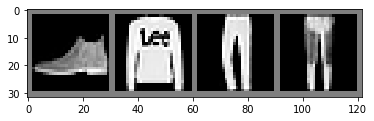

GroundTruth:  Ankle-boot Pullover Trouser Trouser
Predicted:  Ankle-boot Pullover Trouser Trouser


In [14]:
# check predictions by printing the output image for random test inputs.
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs=net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
        